In [1]:
import pandas as pd
from src.data.get_full_data_coinglass import load_data_for_exchange_pair, load_future_data_for_exchange_pair, load_spot_data_for_exchange_pair, compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics, calculate_max_drawdown, analyze_venue_switching_strategy
from src.data.process_tickers import process_tickers_separately
import time

# Example usage of the API
api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-01-01"
end_date = "2024-12-31"
limit = 1000
interval = "4h"

api = CoinGlassAPI(api_key)

# future data
btc_data = load_future_data_for_exchange_pair(api,  "Binance", "BTCUSDT", start_date, end_date, interval, limit, True)
print(btc_data)

# spot data
btc_data = load_spot_data_for_exchange_pair(api,  "Binance", "BTCUSDT", start_date, end_date, interval, limit, True)
print(btc_data)


                   date   timestamp   FR_open  FR_close   FR_high    FR_low  \
0   2024-11-07 16:00:00  1730995200  0.010000  0.010000  0.010000  0.010000   
1   2024-11-07 20:00:00  1731009600  0.010000  0.010000  0.010000  0.010000   
2   2024-11-08 00:00:00  1731024000  0.010000  0.010000  0.010000  0.010000   
3   2024-11-08 04:00:00  1731038400  0.010000  0.010000  0.010000  0.010000   
4   2024-11-08 08:00:00  1731052800  0.010000  0.010000  0.010000  0.010000   
..                  ...         ...       ...       ...       ...       ...   
315 2024-12-30 04:00:00  1735531200  0.006492  0.008791  0.008791  0.006380   
316 2024-12-30 08:00:00  1735545600  0.008791  0.010000  0.010000  0.008791   
317 2024-12-30 12:00:00  1735560000  0.010000  0.010000  0.010000  0.010000   
318 2024-12-30 16:00:00  1735574400  0.010000  0.010000  0.010000  0.010000   
319 2024-12-30 20:00:00  1735588800  0.010000  0.010000  0.010000  0.010000   

    perp_exchange perp_symbol  
0         Binance  

### Getting spot and futures tickers from the API.

In [2]:
include_list =  ['BTC', 'ETH']
exclude_list = ['XBT/USD', 'BTC-USD', 'ETH-USD', 'BTC_USD', 'ETH_USD', 'ETH/USD']

ticker_map_spot = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list) # get tickers for spot

df_ticker_spot = ticker_map_spot.rename(columns={'instrumentId': 'spotInstrumentId'})
df_ticker_spot.to_csv("./data/tickers/ticker_map_spot.csv", index=False)
print(df_ticker_spot)


ticker_map_futures = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list, futures=True) #get tickers for futures

df_ticker_futures = ticker_map_futures.rename(columns={'instrumentId': 'futuresInstrumentId'})
df_ticker_futures.to_csv("./data/tickers/ticker_map_futures.csv", index=False)
print(df_ticker_futures)

      exchange baseAsset spotInstrumentId
0      Binance       BTC          BTCUSDT
1      Binance       ETH          ETHUSDT
2     Bitfinex       BTC           BTCUSD
3     Bitfinex       ETH           ETHUSD
4        Bybit       BTC          BTCUSDT
5        Bybit       ETH          ETHUSDT
6     Coinbase       BTC         BTC-USDT
7     Coinbase       ETH         ETH-USDT
8   Crypto.com       BTC         BTC_USDT
9   Crypto.com       ETH         ETH_USDT
10      Kraken       ETH         ETH/USDT
11      Kraken       BTC         XBT/USDT
12         OKX       BTC         BTC-USDT
13         OKX       ETH         ETH-USDT
     exchange baseAsset futuresInstrumentId
0     Binance       BTC         BTCUSD_PERP
1     Binance       BTC       BTCUSD_250627
2     Binance       BTC       BTCUSD_250926
3     Binance       ETH         ETHUSD_PERP
4     Binance       ETH       ETHUSD_250627
..        ...       ...                 ...
173       OKX       ETH     ETH-USDT-250926
174       OKX     

Manually clean futures tickers. Cleaned tickers in ./data/tickers/ticker_map_futures_cleaned.csv .

### Collect data for our 4 events

#### Luna collapse, 9 may 2022

In [3]:
# Luna collapse 

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2022-03-09" # 2 months before the collapse
end_date = "2022-06-09" # 1 month after the collapse
limit = 4500
interval = "1d" 

api = CoinGlassAPI(api_key)

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
No funding rate data available for BTC-USDT on BingX
No funding rate data available for BTC-USDT on BingX
No futures data available for BTC-USDT on BingX
Processing futures data for ETH-USDT on BingX...
No funding rate data available for ETH-USDT on BingX
No funding rate data available for ETH-USDT on BingX
No futures data available for ETH-USDT on BingX
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data 

#### FTX collapse, 16 nov 2022

In [4]:
# FTX collapse 

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2022-09-16" # 2 months before the collapse
end_date = "2022-12-16" # 1 month after the collapse
limit = 4500
interval = "1d"

api = CoinGlassAPI(api_key)

time.sleep(60) # to avoid hitting the API rate limit

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
No funding rate data available for BTC-USDT on BingX
No funding rate data available for BTC-USDT on BingX
No futures data available for BTC-USDT on BingX
Processing futures data for ETH-USDT on BingX...
No funding rate data available for ETH-USDT on BingX
No funding rate data available for ETH-USDT on BingX
No futures data available for ETH-USDT on BingX
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data 

#### 2021 Bull Run, from 29 jul 2020 to 14 nov 2021 

In [5]:
# 2021 Bull Run : from July 29th, 2020 to November 14th, 2021 

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2020-06-29" 
end_date = "2021-11-14" 
limit = 4500
interval = "1d"

api = CoinGlassAPI(api_key)

time.sleep(60) # to avoid hitting the API rate limit

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
No funding rate data available for BTC-USDT on BingX
No funding rate data available for BTC-USDT on BingX
No futures data available for BTC-USDT on BingX
Processing futures data for ETH-USDT on BingX...
No funding rate data available for ETH-USDT on BingX
No funding rate data available for ETH-USDT on BingX
No futures data available for ETH-USDT on BingX
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data 

#### BTC ETF approval, 10 jan 2024 

In [6]:
# BTC ETF approval

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-12-10" # 1 months before the approval
end_date = "2024-03-10" # 2 month after the approval
limit = 4500
interval = "1d"

api = CoinGlassAPI(api_key)

time.sleep(60) # to avoid hitting the API rate limit

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
Processing futures data for ETH-USDT on BingX...
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data available for BTCUSDT on Bitunix
Processing futures data for ETHUSDT on Bitunix...
No funding rate data available for ETHUSDT on Bitunix
No funding rate data available for ETHUSDT on Bitunix
No futures data available for ETHUSDT on Bitunix
Processing futures data for BTCUSDT on Bybit...
Processing futures d

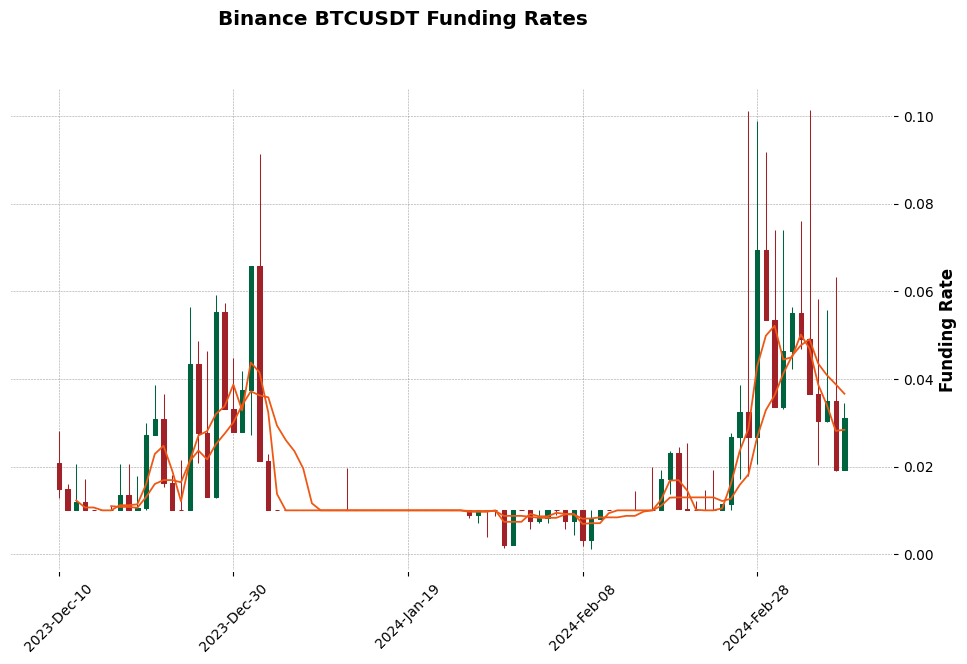

In [ ]:
# plotty plot

import pandas as pd
import mplfinance as mpf

# Load the data
file_path = r"data/funding_rates/Binance_BTCUSDT_1d_funding_rates.csv"
df = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index (required for mplfinance)
df.set_index('date', inplace=True)

# Rename columns to match mplfinance's expected format
# Open, High, Low, Close are required for candlestick charts
df.rename(columns={
    'FR_open': 'Open',
    'FR_high': 'High',
    'FR_low': 'Low',
    'FR_close': 'Close'
}, inplace=True)

# Plot the candlestick chart
mpf.plot(
    df,
    type='candle',  # Candlestick chart
    style='charles',  # Chart style
    title='Binance BTCUSDT Funding Rates',
    ylabel='Funding Rate',
    volume=False,  # Set to True if you want to include volume
    # mav=(3, 7),  # Moving averages (optional)
    figratio=(16, 9),  # Aspect ratio of the figure
    figscale=1.2  # Scale of the figure
)